### Question 1
Import the station status data from station status link and the station information data
from station information link. These JSON files are part of the "General Bikeshare Feed
Specification" and provide real-time records of station status. Create dataframes to
store the current station status and station information.

In [12]:
import requests
import pandas as pd

# Replace these with the actual URLs of your JSON files
station_status_url = 'https://gbfs.lyft.com/gbfs/2.3/bkn/es/station_status.json'
station_info_url = 'https://gbfs.lyft.com/gbfs/2.3/bkn/es/station_information.json'

# Fetch and load station status data into a DataFrame
df_station_status = pd.DataFrame(requests.get(station_status_url).json()['data']['stations'])

# Fetch and load station information data into a DataFrame
df_station_info = pd.DataFrame(requests.get(station_info_url).json()['data']['stations'])

# Display the head of both DataFrames to verify
print("Station Status DataFrame:")
print(df_station_status.head())

print("\nStation Information DataFrame:")
print(df_station_info.head())

Station Status DataFrame:
   last_reported                            vehicle_types_available  \
0     1729514620  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
1     1730827344  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
2     1732649122  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
3     1731339673  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
4     1733235559  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   

   is_installed  num_bikes_available  num_docks_disabled  \
0             0                    0                   0   
1             0                    0                   0   
2             0                    0                   0   
3             0                    0                   3   
4             0                    0                   0   

                             station_id  num_bikes_disabled  \
0  0bd9bd58-42e6-4680-9d19-83943372221f                   0   
1  816e50eb-dc4b-47dc-b773-154e2020cb0d                   0 

In [13]:
df_station_status

last_reported                            vehicle_types_available  \
0        1729514620  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
1        1730827344  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
2        1732649122  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
3        1731339673  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
4        1733235559  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
...             ...                                                ...   
2226     1733242725  [{'count': 1, 'vehicle_type_id': '1'}, {'count...   
2227     1733242744  [{'count': 3, 'vehicle_type_id': '1'}, {'count...   
2228     1733242741  [{'count': 6, 'vehicle_type_id': '1'}, {'count...   
2229     1733242742  [{'count': 6, 'vehicle_type_id': '1'}, {'count...   
2230     1733242742  [{'count': 10, 'vehicle_type_id': '1'}, {'coun...   

      is_installed  num_bikes_available  num_docks_disabled  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                0                    0                   3   
4                0                    0                   0   
...            ...                  ...                 ...   
2226             1                    1                   0   
2227             1                    4                   0   
2228             1                   21                   0   
2229             1                    6                   0   
2230             1                   14                   0   

                                station_id  num_bikes_disabled  \
0     0bd9bd58-42e6-4680-9d19-83943372221f                   0   
1     816e50eb-dc4b-47dc-b773-154e2020cb0d                   0   
2     66dd4ccc-0aca-11e7-82f6-3863bb44ef7c                   0   
3     566a6389-5c22-49ca-8c24-4d9eea135170                   0   
4     66dc7f02-0aca-11e7-82f6-3863bb44ef7c                   0   
...                                    ...                 ...   
2226  66dddc08-0aca-11e7-82f6-3863bb44ef7c                   1   
2227  66ddd8a8-0aca-11e7-82f6-3863bb44ef7c                   0   
2228  cbc48689-7805-49dd-9669-5471f4b7b6fb                   2   
2229  66dddd28-0aca-11e7-82f6-3863bb44ef7c                   0   
2230  5faf99b8-9046-450f-9d2a-d13279b3d016                   2   

      num_ebikes_available  is_returning  num_docks_available  is_renting  \
0                        0             0                    0           0   
1                        0             0                    0           0   
2                        0             0                    0           0   
3                        0             0                    0           0   
4                        0             0                    0           0   
...                    ...           ...                  ...         ...   
2226                     0             1                   12           1   
2227                     1             1                   10           1   
2228                    15             1                    1           1   
2229                     0             1                    7           1   
2230                     4             1                   16           1   

      num_scooters_unavailable  num_scooters_available  
0                          NaN                     NaN  
1                          NaN                     NaN  
2                          NaN                     NaN  
3                          NaN                     NaN  
4                          NaN                     NaN  
...                        ...                     ...  
2226                       0.0                     0.0  
2227                       0.0                     0.0  
2228                       0.0                     0.0  
2229                       0.0                     0.0  
2230           

### Question 2
Merge the two dataframes using a common identifier, and visualize the number of
available bikes based on the geographical areas provided in the station information
data.

In [15]:
df_combined = df_station_status.merge(df_station_info,how='inner',on='station_id')
df_combined

last_reported                            vehicle_types_available  \
0        1729514620  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
1        1730827344  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
2        1732649122  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
3        1731339673  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
4        1733235559  [{'count': 0, 'vehicle_type_id': '1'}, {'count...   
...             ...                                                ...   
2226     1733242725  [{'count': 1, 'vehicle_type_id': '1'}, {'count...   
2227     1733242744  [{'count': 3, 'vehicle_type_id': '1'}, {'count...   
2228     1733242741  [{'count': 6, 'vehicle_type_id': '1'}, {'count...   
2229     1733242742  [{'count': 6, 'vehicle_type_id': '1'}, {'count...   
2230     1733242742  [{'count': 10, 'vehicle_type_id': '1'}, {'coun...   

      is_installed  num_bikes_available  num_docks_disabled  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                0                    0                   3   
4                0                    0                   0   
...            ...                  ...                 ...   
2226             1                    1                   0   
2227             1                    4                   0   
2228             1                   21                   0   
2229             1                    6                   0   
2230             1                   14                   0   

                                station_id  num_bikes_disabled  \
0     0bd9bd58-42e6-4680-9d19-83943372221f                   0   
1     816e50eb-dc4b-47dc-b773-154e2020cb0d                   0   
2     66dd4ccc-0aca-11e7-82f6-3863bb44ef7c                   0   
3     566a6389-5c22-49ca-8c24-4d9eea135170                   0   
4     66dc7f02-0aca-11e7-82f6-3863bb44ef7c                   0   
...                                    ...                 ...   
2226  66dddc08-0aca-11e7-82f6-3863bb44ef7c                   1   
2227  66ddd8a8-0aca-11e7-82f6-3863bb44ef7c                   0   
2228  cbc48689-7805-49dd-9669-5471f4b7b6fb                   2   
2229  66dddd28-0aca-11e7-82f6-3863bb44ef7c                   0   
2230  5faf99b8-9046-450f-9d2a-d13279b3d016                   2   

      num_ebikes_available  is_returning  num_docks_available  is_renting  \
0                        0             0                    0           0   
1                        0             0                    0           0   
2                        0             0                    0           0   
3                        0             0                    0           0   
4                        0             0                    0           0   
...                    ...           ...                  ...         ...   
2226                     0             1                   12           1   
2227                     1             1                   10           1   
2228                    15             1                    1           1   
2229                     0             1                    7           1   
2230                     4             1                   16           1   

      num_scooters_unavailable  num_scooters_available region_id  capacity  \
0                          NaN                     NaN        71        22   
1                          NaN                     NaN        71        19   
2                          NaN                     NaN        71        51   
3                          NaN                     NaN        71         3   
4                          NaN                     NaN        71       109   
...                        ...                     ...       ...       ...   
2226                       0.0                     0.0        70        14   
2227              

In [16]:
import folium

# Initialize a folium map centered around the average location
map_center = [df_combined['lat'].mean(), df_combined['lon'].mean()]
bike_map = folium.Map(location=map_center, zoom_start=12)

# Add stations to the map
for _, row in df_combined.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Station: {row['name']}<br>Bikes Available: {row['num_bikes_available']}",
        tooltip=row['name']
    ).add_to(bike_map)

# Display map
bike_map.save("bike_availability_map.html")
bike_map

### Question 3
How many active stations are currently in service and how many bikes are in service in total?

In [17]:
# Filter active stations where 'is_renting' is 1
active_stations = df_combined[df_combined['is_renting'] == 1]

# Count the number of active stations
num_active_stations = active_stations.shape[0]

# Sum the number of bikes available across all active stations
total_bikes_in_service = active_stations['num_bikes_available'].sum()

# Display the results
print(f"Number of active stations currently in service: {num_active_stations}")
print(f"Total bikes in service: {total_bikes_in_service}")

Number of active stations currently in service: 2198
Total bikes in service: 36177


### Question 4
Determine the current utilization rate for each station by calculating the percentage of
bikes in use relative to the total capacity of each station. Display the utilization rate on a
map.

In [18]:
# Calculate the utilization rate
df_combined['utilization_rate'] = (df_combined['num_bikes_available'] / df_combined['capacity']) * 100

# Define a function to choose marker color based on utilization rate
def get_marker_color(utilization_rate):
    if utilization_rate > 80:
        return 'red'       # High utilization
    elif utilization_rate > 40:
        return 'orange'    # Medium utilization
    else:
        return 'green'     # Low utilization

# Initialize a folium map centered around the average location
map_center = [df_combined['lat'].mean(), df_combined['lon'].mean()]
utilization_map = folium.Map(location=map_center, zoom_start=12)

# Add stations to the map with color-coded markers
for _, row in df_combined.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=7,
        color=get_marker_color(row['utilization_rate']),
        fill=True,
        fill_color=get_marker_color(row['utilization_rate']),
        fill_opacity=0.6,
        popup=(
            f"Station: {row['name']}<br>"
            f"Bikes Available: {row['num_bikes_available']}<br>"
            f"Capacity: {row['capacity']}<br>"
            f"Utilization Rate: {row['utilization_rate']:.2f}%"
        )
    ).add_to(utilization_map)

# Save and display the map
utilization_map.save("bike_utilization_rate_map.html")
utilization_map

### Question 5
Using the station information data, group the stations by neighborhood or area
(region_id). Create a pivot table to show the total number of available bikes, available
docks, and overall capacity for each neighborhood. Identify which neighborhood has
the highest total bike availability and which has the highest total dock availability.

In [19]:
# Use pivot_table to group and aggregate by region_id
pivot_table = pd.pivot_table(
    df_station_info, 
    values='capacity',  # Summing the capacity
    index='region_id',  # Grouping by neighborhood
    aggfunc='sum'  # Summing the capacity for each region_id
)

# Display the pivot table
print(pivot_table)

# Identify the neighborhood with the highest total capacity
max_capacity_region = pivot_table['capacity'].idxmax()
max_capacity_value = pivot_table['capacity'].max()

print(f"Neighborhood with highest total capacity: Region {max_capacity_region} with {max_capacity_value} total capacity.")

           capacity
region_id          
311             580
70             1043
71            67913
Neighborhood with highest total capacity: Region 71 with 67913 total capacity.


### Question 6
Calculate the total number of disabled docks and bikes across all stations. Create a
summary table that includes the station information, total number of disabled docks,
total number of disabled bikes, and the percentage of disabled bikes relative to the total
bikes available at each station.

In [20]:
# Calculate the total number of disabled docks and bikes
df_combined['disabled_docks'] = df_combined['num_docks_disabled']
df_combined['disabled_bikes'] = df_combined['num_bikes_disabled']

# Calculate the percentage of disabled bikes relative to the total available bikes
df_combined['disabled_bike_percentage'] = (df_combined['disabled_bikes'] / df_combined['num_bikes_available']) * 100

# Create a summary table with station information and calculated values
summary_table = df_combined[['station_id', 'name', 'disabled_docks', 'disabled_bikes', 'disabled_bike_percentage']]

# Display the summary table
print(summary_table)

# Calculate the total number of disabled docks and bikes across all stations
total_disabled_docks = df_combined['disabled_docks'].sum()
total_disabled_bikes = df_combined['disabled_bikes'].sum()

print(f"Total number of disabled docks across all stations: {total_disabled_docks}")
print(f"Total number of disabled bikes across all stations: {total_disabled_bikes}")

                                station_id  \
0     0bd9bd58-42e6-4680-9d19-83943372221f   
1     816e50eb-dc4b-47dc-b773-154e2020cb0d   
2     66dd4ccc-0aca-11e7-82f6-3863bb44ef7c   
3     566a6389-5c22-49ca-8c24-4d9eea135170   
4     66dc7f02-0aca-11e7-82f6-3863bb44ef7c   
...                                    ...   
2226  66dddc08-0aca-11e7-82f6-3863bb44ef7c   
2227  66ddd8a8-0aca-11e7-82f6-3863bb44ef7c   
2228  cbc48689-7805-49dd-9669-5471f4b7b6fb   
2229  66dddd28-0aca-11e7-82f6-3863bb44ef7c   
2230  5faf99b8-9046-450f-9d2a-d13279b3d016   

                                          name  disabled_docks  \
0                                6 Ave & 60 St               0   
1                                52 St & 6 Ave               0   
2                  Central Park West & W 72 St               0   
3                                55 St & 5 Ave               3   
4                           Park Ave & E 41 St               0   
...                                        ...     

### Question 7
Is there correlation between the number of disabled docks and bikes?

Pearson correlation between disabled docks and disabled bikes: 0.01828243279936061


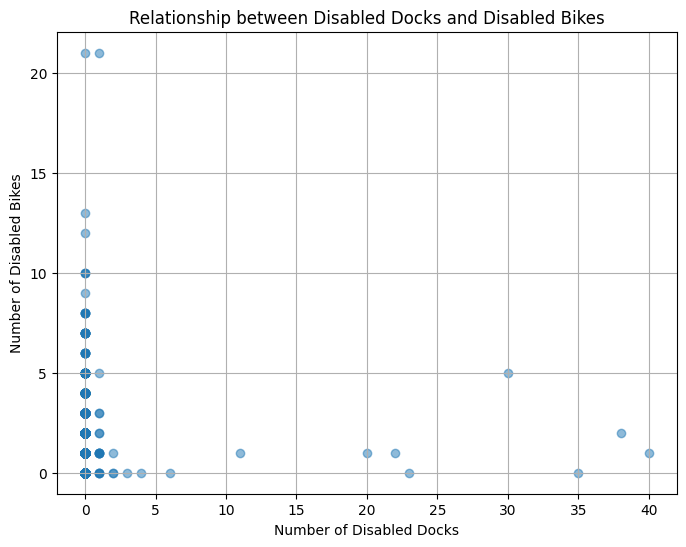

In [21]:
import matplotlib.pyplot as plt
# Calculate correlation between the number of disabled docks and bikes
correlation = df_combined['num_docks_disabled'].corr(df_combined['num_bikes_disabled'])

# Display the correlation value
print(f"Pearson correlation between disabled docks and disabled bikes: {correlation}")

# Optional: Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_combined['num_docks_disabled'], df_combined['num_bikes_disabled'], alpha=0.5)
plt.title('Relationship between Disabled Docks and Disabled Bikes')
plt.xlabel('Number of Disabled Docks')
plt.ylabel('Number of Disabled Bikes')
plt.grid(True)
plt.show()